# Imputación usando Machine Learning

En este ejemplo, vamos a ver como podemos usar modelos de Machine Learning, por ejemplo, la regresión lineal para hacer una mejor estimación de los datos faltantes!

In [1]:
#### Paquetes

import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn import linear_model
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, r2_score

import warnings
warnings.filterwarnings("ignore")

#### Imputación simple

In [2]:
df = pd.read_csv(os.getcwd() + "\\data\\2008_small.csv",nrows = 1000000)

X = df[['AirTime','Distance','TaxiIn','TaxiOut',"DepDelay","ArrDelay","CarrierDelay"]] 
X

,AirTime,Distance,TaxiIn,TaxiOut,DepDelay,ArrDelay,CarrierDelay
0,69.0,431,16.0,78.0,-3.0,60.0,0.0
1,246.0,1848,7.0,9.0,17.0,14.0,NaN
2,89.0,641,7.0,11.0,0.0,-8.0,NaN
3,219.0,1557,8.0,27.0,-4.0,-2.0,NaN
4,64.0,412,5.0,12.0,-5.0,-9.0,NaN
...,...,...,...,...,...,...,...
999995,63.0,377,14.0,8.0,-2.0,-10.0,NaN
999996,57.0,312,6.0,24.0,-3.0,10.0,NaN
999997,134.0,984,8.0,10.0,-4.0,-17.0,NaN
999998,75.0,453,5.0,12.0,-7.0,-15.0,NaN


In [3]:
X.isna().sum()

AirTime          21945
Distance             0
TaxiIn           21509
TaxiOut          19428
DepDelay         19323
ArrDelay         21945
CarrierDelay    782608
dtype: int64

In [4]:
X.mean()

AirTime         104.001648
Distance        726.152046
TaxiIn            6.860292
TaxiOut          16.437527
DepDelay          9.977095
ArrDelay          8.164608
CarrierDelay     15.815577
dtype: float64

In [5]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp.fit(X)       

In [6]:
X = imp.fit_transform(X)

In [7]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,104.001648,726.152046,6.860292,16.437527,9.977095,8.164608,15.815577
std,66.735142,562.204505,4.880676,11.293259,35.034861,38.165629,18.694623
min,0.000000,28.000000,0.000000,0.000000,-79.000000,-86.000000,0.000000
25%,56.000000,325.000000,4.000000,10.000000,-4.000000,-10.000000,15.815577
50%,87.000000,580.000000,6.000000,14.000000,-1.000000,-2.000000,15.815577
75%,131.000000,954.000000,8.000000,19.000000,9.000000,11.000000,15.815577
max,823.000000,4962.000000,240.000000,429.000000,1348.000000,1350.000000,1348.000000


Una aproximación más sólida basada en las relaciones presentes en los datos...

In [8]:
X = df[['AirTime','Distance','TaxiIn','TaxiOut',"DepDelay","ArrDelay","CarrierDelay"]] 
X.corr()

,AirTime,Distance,TaxiIn,TaxiOut,DepDelay,ArrDelay,CarrierDelay
AirTime,1.000000,0.982921,0.086045,0.106584,0.027114,0.034220,-0.011799
Distance,0.982921,1.000000,0.077996,0.090476,0.025593,0.006216,0.006705
TaxiIn,0.086045,0.077996,1.000000,0.039163,0.022978,0.121193,-0.049934
TaxiOut,0.106584,0.090476,0.039163,1.000000,0.101967,0.324712,-0.070147
DepDelay,0.027114,0.025593,0.022978,0.101967,1.000000,0.931193,0.546172
ArrDelay,0.034220,0.006216,0.121193,0.324712,0.931193,1.000000,0.516055
CarrierDelay,-0.011799,0.006705,-0.049934,-0.070147,0.546172,0.516055,1.000000


In [9]:
X = X.dropna(subset=["DepDelay","ArrDelay","TaxiOut"])
newX = X[["DepDelay","ArrDelay","TaxiOut","CarrierDelay"]] 
#Aquí no hay Nans en las 3 columnas explicativas, y sí los hay en CarrierDelay

train = newX[np.isnan(X.CarrierDelay)==False] #No hay Nans
train

,DepDelay,ArrDelay,TaxiOut,CarrierDelay
0,-3.0,60.0,78.0,0.0
6,41.0,28.0,9.0,0.0
11,54.0,64.0,15.0,0.0
21,-4.0,27.0,40.0,0.0
22,5.0,36.0,14.0,5.0
...,...,...,...,...
999987,40.0,40.0,15.0,8.0
999990,29.0,40.0,38.0,0.0
999992,11.0,27.0,15.0,11.0
999994,42.0,34.0,8.0,0.0


In [10]:
regr = linear_model.LinearRegression()
regr.fit(train[["DepDelay","ArrDelay","TaxiOut"]], train["CarrierDelay"])

LinearRegression()

In [11]:
regr.intercept_

-1.363336039238133

In [12]:
regr.coef_

array([ 0.28727669,  0.08765743, -0.0767194 ])

In [13]:
r2_score( train["CarrierDelay"],regr.predict(train[["DepDelay","ArrDelay","TaxiOut"]])  )

0.2992607278363949

Los datos con los que ha aprendido el modelo

In [14]:
train

,DepDelay,ArrDelay,TaxiOut,CarrierDelay
0,-3.0,60.0,78.0,0.0
6,41.0,28.0,9.0,0.0
11,54.0,64.0,15.0,0.0
21,-4.0,27.0,40.0,0.0
22,5.0,36.0,14.0,5.0
...,...,...,...,...
999987,40.0,40.0,15.0,8.0
999990,29.0,40.0,38.0,0.0
999992,11.0,27.0,15.0,11.0
999994,42.0,34.0,8.0,0.0


In [15]:
test = newX[np.isnan(X.CarrierDelay) == True]
test_X = test[["DepDelay","ArrDelay","TaxiOut"]] # Solo las columnas X

Los datos que vamos a usar para imputar el valor de CarrierDelay

In [16]:
test

,DepDelay,ArrDelay,TaxiOut,CarrierDelay
1,17.0,14.0,9.0,NaN
2,0.0,-8.0,11.0,NaN
3,-4.0,-2.0,27.0,NaN
4,-5.0,-9.0,12.0,NaN
5,-2.0,-5.0,11.0,NaN
...,...,...,...,...
999993,3.0,10.0,16.0,NaN
999995,-2.0,-10.0,8.0,NaN
999996,-3.0,10.0,24.0,NaN
999997,-4.0,-17.0,10.0,NaN


In [17]:
imputacion = regr.predict(test_X)
imputacion

array([ 4.05709723, -2.90850887, -4.7591814 , ..., -3.18985732,
       -4.76981315, -5.60976716])

In [18]:
np.mean(imputacion)

-3.304334663595517

Sobreescribimos los datos imputados en el objeto original

In [19]:
X.loc[np.isnan(X.CarrierDelay),"CarrierDelay"] = imputacion

In [20]:
X.CarrierDelay[X.CarrierDelay < 0] = 0

In [21]:
X

,AirTime,Distance,TaxiIn,TaxiOut,DepDelay,ArrDelay,CarrierDelay
0,69.0,431,16.0,78.0,-3.0,60.0,0.000000
1,246.0,1848,7.0,9.0,17.0,14.0,4.057097
2,89.0,641,7.0,11.0,0.0,-8.0,0.000000
3,219.0,1557,8.0,27.0,-4.0,-2.0,0.000000
4,64.0,412,5.0,12.0,-5.0,-9.0,0.000000
...,...,...,...,...,...,...,...
999995,63.0,377,14.0,8.0,-2.0,-10.0,0.000000
999996,57.0,312,6.0,24.0,-3.0,10.0,0.000000
999997,134.0,984,8.0,10.0,-4.0,-17.0,0.000000
999998,75.0,453,5.0,12.0,-7.0,-15.0,0.000000


# Reducción de Dimensionalidad. PCA

Principal Component Analysis, basado en la reestructuración de las variables (columnas) para agrupar más porcentaje de varianza.

In [22]:
df = pd.read_csv(os.getcwd() + "\\data\\2008_small.csv",nrows = 1000000)

df = df.dropna(subset = ['AirTime','Distance','TaxiIn','TaxiOut',"DepDelay","ArrDelay"])
df = df.sample(frac=1).head(1000)

X = df[['AirTime','Distance','TaxiIn','TaxiOut',"DepDelay","ArrDelay"]] 
columnas = X.columns

In [23]:
X

,AirTime,Distance,TaxiIn,TaxiOut,DepDelay,ArrDelay
812634,260.0,2182,5.0,16.0,-7.0,-19.0
827999,86.0,619,4.0,16.0,27.0,20.0
124885,140.0,850,3.0,71.0,-10.0,20.0
169962,137.0,1215,8.0,13.0,-6.0,-28.0
879990,92.0,550,5.0,8.0,-10.0,-8.0
...,...,...,...,...,...,...
684610,120.0,802,17.0,13.0,-1.0,-11.0
509728,56.0,337,5.0,6.0,-4.0,-22.0
613364,44.0,291,12.0,12.0,-1.0,-1.0
501296,86.0,656,6.0,18.0,7.0,9.0


In [24]:
scaler = StandardScaler()   ## IMPORTANTISIMO ##
scaler.fit(X)

X = scaler.transform(X)

pca = PCA(n_components=2) # El numero de componentes son la cantidad de nuevas columnas que quiero
pca.fit(X)

PCA(n_components=2)

In [25]:
columnas

Index(['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay', 'ArrDelay'], dtype='object')

In [26]:
X

array([[ 2.34653299,  2.60266106, -0.29556927, -0.04427771, -0.48152577,
        -0.71412188],
       [-0.24442897, -0.17892941, -0.46622127, -0.04427771,  0.5612689 ,
         0.36181991],
       [ 0.55966267,  0.23216937, -0.63687327,  4.99769726, -0.57353707,
         0.36181991],
       ...,
       [-0.86983358, -0.76265409,  0.89899475, -0.4109668 , -0.29750319,
        -0.21753336],
       [-0.24442897, -0.11308242, -0.12491727,  0.13906684, -0.05213973,
         0.05834915],
       [-0.75070889, -0.63273976, -0.63687327, -0.31929452, -0.42018491,
        -0.65894538]])

In [27]:
print(np.round(pca.components_,2)) # nuevas columnas x viejas columnas

[[ 0.35  0.34  0.26  0.25  0.55  0.58]
 [-0.61 -0.61  0.11  0.04  0.33  0.35]]


In [28]:
columnas

Index(['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay', 'ArrDelay'], dtype='object')

In [29]:
pd.DataFrame(np.round(pca.components_,2),columns=columnas)

# 1a componente, vuelos largos y retrasos altos (vuelos cortos, retrasos bajos)
# 2a componente, vuelos cortos y retrasos altos (vuelos largos, retrasos bajos)

,AirTime,Distance,TaxiIn,TaxiOut,DepDelay,ArrDelay
0,0.35,0.34,0.26,0.25,0.55,0.58
1,-0.61,-0.61,0.11,0.04,0.33,0.35


La interpretación de los datos se relaciona de manera directa con las columnas originales

In [30]:
print(pca.explained_variance_ratio_)

[0.35902098 0.32394429]


In [31]:
nuevosvalores = pca.transform(X)
nuevosvalores

array([[ 0.94782802, -3.47925817],
       [ 0.23963267,  0.52082754],
       [ 1.24758416, -0.44274657],
       ...,
       [-0.72578059,  0.90947328],
       [-0.11610032,  0.21302206],
       [-1.33184914,  0.3928013 ]])

Visualizar la transformación del espacio

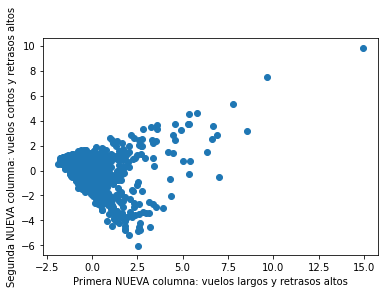

In [32]:
plt.scatter(nuevosvalores[:,0],nuevosvalores[:,1],)
plt.xlabel("Primera NUEVA columna: vuelos largos y retrasos altos")
plt.ylabel("Segunda NUEVA columna: vuelos cortos y retrasos altos")
plt.show()

## Ejercicios. Imputación y PCA


1. Ejecuta el siguiente código para generarte unos datos de ejemplo con NAs

In [33]:
from pydataset import data
iris = data('iris')
iris["Petal.Length"][np.random.uniform(0, 1, size=iris.shape[0]) >.8]= np.nan
posicionesna = np.isnan(iris["Petal.Length"])
iris.head()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [34]:
iris = sns.load_dataset("iris")
iris["petal_length"][np.random.uniform(0, 1, size=iris.shape[0]) >.8]= np.nan

iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [35]:
posicionesna = np.isnan(iris["petal_length"])
posicionesna

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14      True
15     False
16      True
17      True
18     False
19      True
20     False
21     False
22      True
23     False
24     False
25      True
26     False
27      True
28      True
29     False
30     False
31     False
32     False
33     False
34      True
35     False
36     False
37     False
38      True
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48      True
49     False
50      True
51     False
52     False
53     False
54     False
55      True
56     False
57     False
58     False
59     False
60     False
61      True
62     False
63     False
64     False
65     False
66     False
67     False
68      True
69     False
70     False
71     False
72      True
73     False
74     False
75     False
76     False

2. Utilizando las técnicas que hemos visto hasta ahora, prueba de imputar los datos faltantes usando la media o la mediana

3. Usando las demás columnas que consideres relevantes, imputa los valores faltantes mediante un modelo de regresión lineal

4. Visualiza los datos iris completos usando PCA (convirtiendo 4 columnas en 2).

5. Usando Kmeans, el clustering jerárquico o cualquier otro algoritmo de agrupación, visualiza los resultados de agrupar el dataframe iris, con los dos primeros componentes principales

6. (Extra) Ajustar un modelo de regresión/clasificación para predecir alguna variable, usando nuevas columnas PCA como variables predictoras

# Support Vector Machine

Los SVM son algoritmos de clasificación y regresión que representan transformaciones de los datos más flexibles que las relaciones lineales.

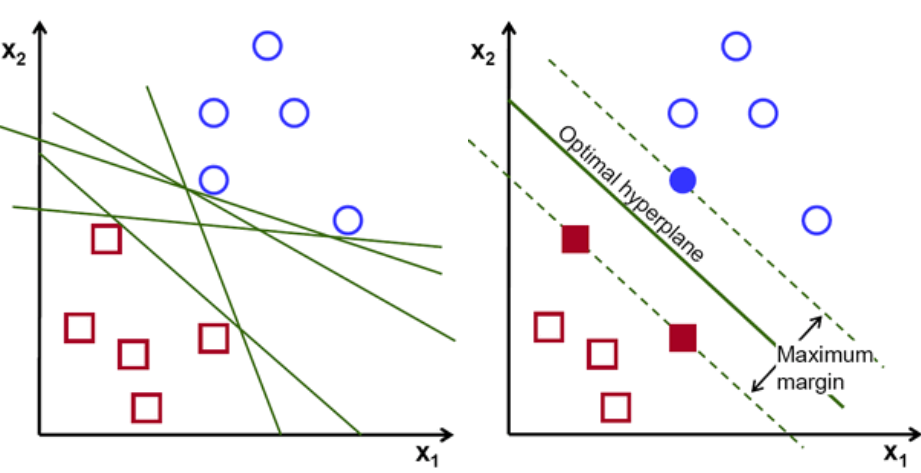

#### Ejemplo Sencillo

In [36]:
df = pd.read_csv(os.getcwd() + "\\data\\2008_small.csv",nrows = 10000)

df = df.dropna(subset =['AirTime','Distance','TaxiIn','TaxiOut'])
df = df.sample(frac=1).head(2000)

X = df[['AirTime','Distance','TaxiIn','TaxiOut']] 
Y = df['ArrDelay'] > np.median(df["ArrDelay"])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

In [37]:
np.mean(Y)

0.487

In [38]:
# Si se queda infinitamente atrapado, tenemos que rearrancar, pero con parámetros de parada.
# max_iter // tol // cache

svc = svm.SVC(C = 0.1,kernel = 'linear', tol = 1e-2)
svc.fit(X_train, y_train)
np.mean( svc.predict(X_test) == y_test)

0.6575

Parámetros de un SVM:
    
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html 
- C: Parámetro de complejidad
- kernel (transformación de los datos) {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

## Automatic parameter Tuning / Model estimation

Not working really fast :'(

In [39]:
# parameters = {'kernel':('linear', 'poly','rbf'), 'C':[1,5,10]}
parameters = {'kernel':('linear','rbf','poly','sigmoid'), 'C':[0.001,0.01,0.05,0.1,0.5]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,verbose=3,n_jobs=-1)
clf.fit(X, Y)

print("DONE")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
DONE


¿Qué es la Cross Validation?

In [40]:
clf.cv_results_

{'mean_fit_time': array([3.73068380e-01, 8.12561035e-02, 6.56305313e-02, 9.26409721e-02,
        2.60327187e+00, 8.06604862e-02, 6.56299114e-02, 8.75061035e-02,
        1.18675324e+01, 8.74541759e-02, 7.69495964e-02, 9.07512665e-02,
        1.90830110e+01, 7.65834332e-02, 7.89337158e-02, 6.76436901e-02,
        5.99458473e+01, 7.52196789e-02, 1.09766865e-01, 5.00039101e-02]),
 'std_fit_time': array([3.49982610e-02, 6.25052453e-03, 6.25033381e-03, 5.15285083e-03,
        2.60416114e-01, 7.97213320e-03, 6.25040534e-03, 7.65525892e-03,
        1.34991316e+00, 5.83917750e-03, 1.07609059e-02, 2.47505557e-03,
        1.47215910e+00, 5.82637727e-03, 1.05852720e-02, 3.09653215e-03,
        8.90016422e+00, 3.37759625e-03, 8.81917109e-03, 6.25019076e-03]),
 'mean_score_time': array([0.012501  , 0.05312991, 0.009376  , 0.01811366, 0.00805526,
        0.05000381, 0.01562624, 0.01875176, 0.00980897, 0.05928221,
        0.01403818, 0.02081909, 0.00383139, 0.0531292 , 0.01578422,
        0.01165614, 

Nos permite dar una primera intuición de los parámetros que funcionan mejor

In [41]:
clf.best_params_

{'C': 0.001, 'kernel': 'linear'}

In [42]:
clf.cv_results_['mean_test_score']

array([0.652 , 0.513 , 0.5105, 0.513 , 0.652 , 0.513 , 0.5105, 0.513 ,
       0.6515, 0.5065, 0.514 , 0.52  , 0.6515, 0.5055, 0.5145, 0.4905,
       0.6515, 0.512 , 0.528 , 0.4875])

In [43]:
clf.best_score_

0.6520000000000001

# Neural Networks

Una explicación visual de las redes neuronales

https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.44747&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

En resumen, se trata de un modelo clasificador/regresor que busca detectar patrones mediante la combinación de transformaciones de los datos, las llamadas "neuronas".

In [44]:
df = pd.read_csv(os.getcwd() + "\\data\\2008_small.csv",nrows = 1000000)

df = df.dropna(subset =['AirTime','Distance','TaxiIn','TaxiOut'])
df = df.sample(frac=1).head(10000)

X = df[['AirTime','Distance','TaxiIn','TaxiOut']] 
Y = df['ArrDelay']

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X = pd.DataFrame(X_poly, columns = poly.get_feature_names(input_features=X.columns))


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=1)

scaler = StandardScaler()  
scaler.fit(X_train) # conocimiento

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
regr = MLPRegressor(solver='lbfgs', alpha=0.001, hidden_layer_sizes=(10,10,10)) #The ith element represents the number of neurons in the ith hidden layer.

model = regr.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R cuadrado: ",r2_score(y_test, predictions))

R cuadrado:  0.07733956390644126


Comparamos con el modelo de regresión lineal

In [46]:
regrLin = linear_model.LinearRegression()
regrLin.fit(X_train,y_train)
y_pred = regrLin.predict(X_test)
print("R cuadrado: ",r2_score(y_test, y_pred))

R cuadrado:  0.09610392361073528


Algunos de los parámetros con los que podemos jugar en los modelos de red neurnal son:
    
- solver: {‘lbfgs’, ‘sgd’, ‘adam’}    
- activation : {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
- alpha : float, optional, default 0.0001 L2 penalty
- learning_rate : {‘constant’, ‘invscaling’, ‘adaptive’}

Considerar la cantidad de combinaciones posibles de parámetros...

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

### Selección de parámetros automatizada (sin funciones)

Más potente, más flexible, más control... pero requiere más código...

In [47]:
# Modelo con 3 capas

alphas = [0.0000001,0.001,0.1]
layers = [2,5,10,20]
solvers = ["lbfgs","adam","sgd"]
listtodf = []
i = 0
print("Iterations:", len(alphas)*len(layers) ** 3 *len(solvers))

for alpha in alphas:
    for layer1 in layers: 
        for layer2 in layers:
            for layer3 in layers:
                for solver in solvers:
                    i += 1 # i = i + 1 // i++
                    regr = MLPRegressor(solver=solver, alpha=alpha, hidden_layer_sizes=(layer1,layer2,layer3),warm_start=True)
                    model = regr.fit(X_train, y_train)
                    predictions = model.predict(X_test)
                    print(i, 
                          "R cuadrado: ",round(r2_score(y_test, predictions),2), 
                          " Solver: ",solver, 
                          " Layer size: ", (layer1,layer2,layer3),
                          " Alpha: ",alpha)
                    listtodf.append([alpha,(layer1,layer2,layer3),solver,r2_score(y_test, predictions)])

Iterations: 576
1 R cuadrado:  0.1  Solver:  lbfgs  Layer size:  (2, 2, 2)  Alpha:  1e-07
2 R cuadrado:  0.1  Solver:  adam  Layer size:  (2, 2, 2)  Alpha:  1e-07
3 R cuadrado:  0.07  Solver:  sgd  Layer size:  (2, 2, 2)  Alpha:  1e-07
4 R cuadrado:  0.09  Solver:  lbfgs  Layer size:  (2, 2, 5)  Alpha:  1e-07
5 R cuadrado:  0.09  Solver:  adam  Layer size:  (2, 2, 5)  Alpha:  1e-07
6 R cuadrado:  0.08  Solver:  sgd  Layer size:  (2, 2, 5)  Alpha:  1e-07
7 R cuadrado:  0.09  Solver:  lbfgs  Layer size:  (2, 2, 10)  Alpha:  1e-07
8 R cuadrado:  0.1  Solver:  adam  Layer size:  (2, 2, 10)  Alpha:  1e-07
9 R cuadrado:  -0.0  Solver:  sgd  Layer size:  (2, 2, 10)  Alpha:  1e-07
10 R cuadrado:  0.09  Solver:  lbfgs  Layer size:  (2, 2, 20)  Alpha:  1e-07
11 R cuadrado:  0.1  Solver:  adam  Layer size:  (2, 2, 20)  Alpha:  1e-07
12 R cuadrado:  -0.0  Solver:  sgd  Layer size:  (2, 2, 20)  Alpha:  1e-07
13 R cuadrado:  0.08  Solver:  lbfgs  Layer size:  (2, 5, 2)  Alpha:  1e-07
14 R cuadrado: 

109 R cuadrado:  0.05  Solver:  lbfgs  Layer size:  (10, 5, 2)  Alpha:  1e-07
110 R cuadrado:  0.09  Solver:  adam  Layer size:  (10, 5, 2)  Alpha:  1e-07
111 R cuadrado:  0.07  Solver:  sgd  Layer size:  (10, 5, 2)  Alpha:  1e-07
112 R cuadrado:  0.08  Solver:  lbfgs  Layer size:  (10, 5, 5)  Alpha:  1e-07
113 R cuadrado:  0.09  Solver:  adam  Layer size:  (10, 5, 5)  Alpha:  1e-07
114 R cuadrado:  0.03  Solver:  sgd  Layer size:  (10, 5, 5)  Alpha:  1e-07
115 R cuadrado:  0.07  Solver:  lbfgs  Layer size:  (10, 5, 10)  Alpha:  1e-07
116 R cuadrado:  0.09  Solver:  adam  Layer size:  (10, 5, 10)  Alpha:  1e-07
117 R cuadrado:  0.07  Solver:  sgd  Layer size:  (10, 5, 10)  Alpha:  1e-07
118 R cuadrado:  0.07  Solver:  lbfgs  Layer size:  (10, 5, 20)  Alpha:  1e-07
119 R cuadrado:  0.09  Solver:  adam  Layer size:  (10, 5, 20)  Alpha:  1e-07
120 R cuadrado:  0.09  Solver:  sgd  Layer size:  (10, 5, 20)  Alpha:  1e-07
121 R cuadrado:  0.08  Solver:  lbfgs  Layer size:  (10, 10, 2)  Alpha

215 R cuadrado:  0.09  Solver:  adam  Layer size:  (2, 5, 20)  Alpha:  0.001
216 R cuadrado:  0.05  Solver:  sgd  Layer size:  (2, 5, 20)  Alpha:  0.001
217 R cuadrado:  -0.0  Solver:  lbfgs  Layer size:  (2, 10, 2)  Alpha:  0.001
218 R cuadrado:  0.09  Solver:  adam  Layer size:  (2, 10, 2)  Alpha:  0.001
219 R cuadrado:  -0.0  Solver:  sgd  Layer size:  (2, 10, 2)  Alpha:  0.001
220 R cuadrado:  0.09  Solver:  lbfgs  Layer size:  (2, 10, 5)  Alpha:  0.001
221 R cuadrado:  0.1  Solver:  adam  Layer size:  (2, 10, 5)  Alpha:  0.001
222 R cuadrado:  -0.0  Solver:  sgd  Layer size:  (2, 10, 5)  Alpha:  0.001
223 R cuadrado:  0.09  Solver:  lbfgs  Layer size:  (2, 10, 10)  Alpha:  0.001
224 R cuadrado:  0.1  Solver:  adam  Layer size:  (2, 10, 10)  Alpha:  0.001
225 R cuadrado:  0.08  Solver:  sgd  Layer size:  (2, 10, 10)  Alpha:  0.001
226 R cuadrado:  0.09  Solver:  lbfgs  Layer size:  (2, 10, 20)  Alpha:  0.001
227 R cuadrado:  0.1  Solver:  adam  Layer size:  (2, 10, 20)  Alpha:  0.0

322 R cuadrado:  0.08  Solver:  lbfgs  Layer size:  (10, 10, 20)  Alpha:  0.001
323 R cuadrado:  0.09  Solver:  adam  Layer size:  (10, 10, 20)  Alpha:  0.001
324 R cuadrado:  0.09  Solver:  sgd  Layer size:  (10, 10, 20)  Alpha:  0.001
325 R cuadrado:  -0.0  Solver:  lbfgs  Layer size:  (10, 20, 2)  Alpha:  0.001
326 R cuadrado:  0.09  Solver:  adam  Layer size:  (10, 20, 2)  Alpha:  0.001
327 R cuadrado:  0.08  Solver:  sgd  Layer size:  (10, 20, 2)  Alpha:  0.001
328 R cuadrado:  0.06  Solver:  lbfgs  Layer size:  (10, 20, 5)  Alpha:  0.001
329 R cuadrado:  0.09  Solver:  adam  Layer size:  (10, 20, 5)  Alpha:  0.001
330 R cuadrado:  0.07  Solver:  sgd  Layer size:  (10, 20, 5)  Alpha:  0.001
331 R cuadrado:  0.06  Solver:  lbfgs  Layer size:  (10, 20, 10)  Alpha:  0.001
332 R cuadrado:  0.09  Solver:  adam  Layer size:  (10, 20, 10)  Alpha:  0.001
333 R cuadrado:  0.09  Solver:  sgd  Layer size:  (10, 20, 10)  Alpha:  0.001
334 R cuadrado:  0.07  Solver:  lbfgs  Layer size:  (10, 2

429 R cuadrado:  0.07  Solver:  sgd  Layer size:  (2, 20, 10)  Alpha:  0.1
430 R cuadrado:  0.08  Solver:  lbfgs  Layer size:  (2, 20, 20)  Alpha:  0.1
431 R cuadrado:  0.1  Solver:  adam  Layer size:  (2, 20, 20)  Alpha:  0.1
432 R cuadrado:  0.05  Solver:  sgd  Layer size:  (2, 20, 20)  Alpha:  0.1
433 R cuadrado:  0.08  Solver:  lbfgs  Layer size:  (5, 2, 2)  Alpha:  0.1
434 R cuadrado:  -0.0  Solver:  adam  Layer size:  (5, 2, 2)  Alpha:  0.1
435 R cuadrado:  0.09  Solver:  sgd  Layer size:  (5, 2, 2)  Alpha:  0.1
436 R cuadrado:  0.08  Solver:  lbfgs  Layer size:  (5, 2, 5)  Alpha:  0.1
437 R cuadrado:  0.09  Solver:  adam  Layer size:  (5, 2, 5)  Alpha:  0.1
438 R cuadrado:  0.01  Solver:  sgd  Layer size:  (5, 2, 5)  Alpha:  0.1
439 R cuadrado:  0.08  Solver:  lbfgs  Layer size:  (5, 2, 10)  Alpha:  0.1
440 R cuadrado:  0.09  Solver:  adam  Layer size:  (5, 2, 10)  Alpha:  0.1
441 R cuadrado:  0.04  Solver:  sgd  Layer size:  (5, 2, 10)  Alpha:  0.1
442 R cuadrado:  0.08  Solver

538 R cuadrado:  0.07  Solver:  lbfgs  Layer size:  (20, 2, 20)  Alpha:  0.1
539 R cuadrado:  0.09  Solver:  adam  Layer size:  (20, 2, 20)  Alpha:  0.1
540 R cuadrado:  0.08  Solver:  sgd  Layer size:  (20, 2, 20)  Alpha:  0.1
541 R cuadrado:  0.06  Solver:  lbfgs  Layer size:  (20, 5, 2)  Alpha:  0.1
542 R cuadrado:  0.08  Solver:  adam  Layer size:  (20, 5, 2)  Alpha:  0.1
543 R cuadrado:  0.09  Solver:  sgd  Layer size:  (20, 5, 2)  Alpha:  0.1
544 R cuadrado:  0.08  Solver:  lbfgs  Layer size:  (20, 5, 5)  Alpha:  0.1
545 R cuadrado:  0.08  Solver:  adam  Layer size:  (20, 5, 5)  Alpha:  0.1
546 R cuadrado:  0.09  Solver:  sgd  Layer size:  (20, 5, 5)  Alpha:  0.1
547 R cuadrado:  0.06  Solver:  lbfgs  Layer size:  (20, 5, 10)  Alpha:  0.1
548 R cuadrado:  0.09  Solver:  adam  Layer size:  (20, 5, 10)  Alpha:  0.1
549 R cuadrado:  0.05  Solver:  sgd  Layer size:  (20, 5, 10)  Alpha:  0.1
550 R cuadrado:  0.06  Solver:  lbfgs  Layer size:  (20, 5, 20)  Alpha:  0.1
551 R cuadrado:  

In [48]:
listtodf

[[1e-07, (2, 2, 2), 'lbfgs', 0.09596794388324226],
 [1e-07, (2, 2, 2), 'adam', 0.09567508416209447],
 [1e-07, (2, 2, 2), 'sgd', 0.0669436645130792],
 [1e-07, (2, 2, 5), 'lbfgs', 0.09258429431839499],
 [1e-07, (2, 2, 5), 'adam', 0.0937923062498136],
 [1e-07, (2, 2, 5), 'sgd', 0.07680489596154294],
 [1e-07, (2, 2, 10), 'lbfgs', 0.09401886622521638],
 [1e-07, (2, 2, 10), 'adam', 0.09570363600481113],
 [1e-07, (2, 2, 10), 'sgd', -0.0009274817279767422],
 [1e-07, (2, 2, 20), 'lbfgs', 0.09148280861255942],
 [1e-07, (2, 2, 20), 'adam', 0.09693454462436324],
 [1e-07, (2, 2, 20), 'sgd', -0.0014535126947639032],
 [1e-07, (2, 5, 2), 'lbfgs', 0.08415354665211205],
 [1e-07, (2, 5, 2), 'adam', 0.0901814577819845],
 [1e-07, (2, 5, 2), 'sgd', -0.001669089732865947],
 [1e-07, (2, 5, 5), 'lbfgs', 0.08596132286457447],
 [1e-07, (2, 5, 5), 'adam', 0.09047433424274631],
 [1e-07, (2, 5, 5), 'sgd', 0.05999198926649141],
 [1e-07, (2, 5, 10), 'lbfgs', 0.08501597577477171],
 [1e-07, (2, 5, 10), 'adam', 0.097542

Obteniendo conclusiones sobre los datos

In [49]:
parameters = pd.DataFrame(listtodf, columns =['Alphas', 'Layers','Solvers','R2']) 
parameters.to_csv("parameters.csv")

In [50]:
parameters = pd.read_csv("parameters.csv",index_col = 0)
parameters

,Alphas,Layers,Solvers,R2
0,1.000000e-07,"(2, 2, 2)",lbfgs,0.095968
1,1.000000e-07,"(2, 2, 2)",adam,0.095675
2,1.000000e-07,"(2, 2, 2)",sgd,0.066944
3,1.000000e-07,"(2, 2, 5)",lbfgs,0.092584
4,1.000000e-07,"(2, 2, 5)",adam,0.093792
...,...,...,...,...
571,1.000000e-01,"(20, 20, 10)",adam,0.078878
572,1.000000e-01,"(20, 20, 10)",sgd,0.088373
573,1.000000e-01,"(20, 20, 20)",lbfgs,0.081726
574,1.000000e-01,"(20, 20, 20)",adam,0.081590


In [51]:
parameters.groupby("Alphas").mean()["R2"].sort_values(ascending = False)

Alphas
1.000000e-07    0.072858
1.000000e-01    0.069293
1.000000e-03    0.068716
Name: R2, dtype: float64

In [52]:
parameters.groupby("Layers").mean()["R2"].sort_values(ascending = False)

Layers
(2, 20, 5)      0.089853
(2, 20, 10)     0.088050
(2, 10, 10)     0.087823
(5, 5, 5)       0.083975
(2, 20, 20)     0.083683
(2, 5, 5)       0.083314
(5, 10, 10)     0.082201
(5, 20, 20)     0.081858
(10, 10, 5)     0.081526
(10, 10, 20)    0.081428
(5, 10, 20)     0.081007
(20, 20, 10)    0.079871
(20, 5, 5)      0.079598
(10, 20, 20)    0.079032
(5, 5, 20)      0.078451
(2, 5, 10)      0.078081
(2, 2, 10)      0.077385
(2, 5, 20)      0.077192
(20, 2, 10)     0.077063
(2, 10, 5)      0.076781
(10, 10, 10)    0.076675
(10, 20, 10)    0.076614
(20, 10, 20)    0.076487
(20, 10, 10)    0.076413
(5, 20, 5)      0.076276
(5, 10, 2)      0.076096
(20, 5, 20)     0.075833
(5, 2, 10)      0.075578
(5, 20, 10)     0.075435
(20, 10, 5)     0.075123
(5, 2, 20)      0.075112
(5, 10, 5)      0.075071
(10, 2, 20)     0.074667
(10, 20, 5)     0.074300
(20, 2, 20)     0.074171
(10, 2, 10)     0.073691
(5, 5, 10)      0.072295
(10, 5, 5)      0.071625
(10, 5, 10)     0.070990
(2, 10, 20)     0.

In [53]:
parameters.groupby("Solvers").mean()["R2"].sort_values(ascending = False)

Solvers
adam     0.084045
lbfgs    0.069072
sgd      0.057751
Name: R2, dtype: float64

In [54]:
parameters[parameters.R2 == max(parameters.R2)]

,Alphas,Layers,Solvers,R2
88,1.000000e-07,"(5, 20, 5)",adam,0.099437


## Ejercicio

Intenta clasificar/predecir lo mejor que puedas los datos de iris o algún dataset sencillo, usando uno de los dos modelos que hemos visto (SVM y NN). Puedes usar una de las columnas numéricas como respuesta (regresión) o la columa "species" (clasificación).

Aprovecha para añadir nuevas variables (feature engineering), seleccionar alguno de los parámetros que funcionan mejor con estos datos, etc.

© Netmind S.L.

Todos los derechos reservados. Este documento (v1.00) ha sido diseñado para el uso exclusivo del cliente que atiende a esta formación.

Ninguna parte de este documento puede ser reproducida, distribuida o transmitida en cualquier forma o por cualquier medio sin el permiso previo por escrito de Netmind.